# Exploratory data analysis of wine data

## Libraries and settings

In [32]:
# Libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import statsmodels.api as sm
import pylab as py

# seaborn graphics settings
sns.set(color_codes=True)

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Show current working directory
print(os.getcwd())

/workspaces/wine_analysis/notebooks


## Univariate non-graphical exploratory data analysis (EDA)

### Importing the enriched wine data

In [33]:
# Read and select variables
df_orig = pd.read_csv("../data/enriched/wine_data_enriched.csv")[['web-scraper-order',
                                                        'name',
                                                        'price',
                                                        'country',
                                                        'quantity',
                                                        'value',
                                                        'bio', 
                                                        'non_alcoholic', 
                                                        'premium', 
                                                        'wine_category', 
                                                        'price_category',
                                                        'price_per_10cl',
                                                        'quantity_in_cl',
                                                        'country_code',
                                                        'consumption_in_l',
                                                        ]]

# Remove duplicates
df_orig = df_orig.drop_duplicates()
df_orig.head(5)

# Remove missing values
df_orig = df_orig.dropna()
df_orig.head(5)

,web-scraper-order,name,price,country,quantity,value,bio,non_alcoholic,premium,wine_category,price_category,price_per_10cl,quantity_in_cl,country_code,consumption_in_l
0,1734709733-1,"NATURAPLAN BIO-PROSECCO DOC RAPHAEL DAL BO, EX...",11.95,Italien,75cl,1.59/10cl,1,0,0,SCHAUMWEIN,Mid-Range,1.59,75,ITA,4.83
1,1734709733-3,ZÜRICH AOC STAATSSCHREIBER CUVÉE BLANC PRESTIGE,12.70,Schweiz,75cl,1.69/10cl,0,0,1,WEISSWEIN,Mid-Range,1.69,75,CHE,4.35
2,1734709733-4,PROSECCO SUPERIORE DI VALDOBBIADENE CONEGLIANO...,10.95,Italien,75cl,1.46/10cl,0,0,1,SCHAUMWEIN,Mid-Range,1.46,75,ITA,4.83
3,1734709733-5,AIGLE LES MURAILLES CHABLAIS AOC H. BADOUX,22.50,Schweiz,70cl,3.21/10cl,0,0,0,UNCATEGORIZED,Mid-Range,3.21,70,CHE,4.35
4,1734709733-6,"CHAMPAGNE AOC CHARLES BERTIN, BRUT",19.50,Frankreich,75cl,2.60/10cl,0,0,0,SCHAUMWEIN,Mid-Range,2.60,75,FRA,6.44


### Quantiles original values

In [34]:
df = df_orig

df_orig[['price', 'price_per_10cl', 'consumption_in_l']].quantile(q=[0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95]).round(2)

,price,price_per_10cl,consumption_in_l
0.05,6.95,0.73,3.52
0.10,6.95,0.93,3.52
0.25,9.30,0.99,4.35
0.50,11.95,1.46,4.83
0.75,18.95,2.14,6.04
0.90,38.50,3.21,6.44
0.95,41.70,3.40,6.44


### Shape (number of rows and colums)

In [35]:
# Number of rows and columns
print(df.shape)

(540, 15)


### Data types

In [36]:
df.dtypes

web-scraper-order     object
name                  object
price                float64
country               object
quantity              object
value                 object
bio                    int64
non_alcoholic          int64
premium                int64
wine_category         object
price_category        object
price_per_10cl       float64
quantity_in_cl         int64
country_code          object
consumption_in_l     float64
dtype: object

### Summary statistics of numeric variables

In [37]:
df.describe()

,price,bio,non_alcoholic,premium,price_per_10cl,quantity_in_cl,consumption_in_l
count,540.000000,540.000000,540.0,540.000000,540.000000,540.000000,540.000000
mean,15.585185,0.074074,0.0,0.148148,1.731111,71.185185,4.944074
std,10.159241,0.262134,0.0,0.355576,0.961775,20.389595,0.962882
min,4.500000,0.000000,0.0,0.000000,0.600000,6.000000,3.020000
25%,9.300000,0.000000,0.0,0.000000,0.990000,75.000000,4.350000
50%,11.950000,0.000000,0.0,0.000000,1.460000,75.000000,4.830000
75%,18.950000,0.000000,0.0,0.000000,2.140000,75.000000,6.040000
max,42.600000,1.000000,0.0,1.000000,5.130000,120.000000,6.440000


### Statistical measures (min, max, std, mean, median, count) for selected variables

In [38]:
# Price
print('Price:',
      'Count:', round(df.price.count(), 1),
      'Min:', round(df.price.min(), 1),
      'Max:', round(df.price.max(), 1),
      'Mean:', round(df.price.mean(), 1),
      'Median:', round(df.price.median(), 1),
      'Std:', round(df.price.std(), 1))

# Price per 10cl
print('Price per 10cl:',
      'Count:', round(df.price_per_10cl.count(), 1),
      'Min:', round(df.price_per_10cl.min(), 1),
      'Max:', round(df.price_per_10cl.max(), 1),
      'Mean:', round(df.price_per_10cl.mean(), 1),
      'Median:', round(df.price_per_10cl.median(), 1),
      'Std:', round(df.price_per_10cl.std(), 1))

# Quantity
print('Quantity:',
      'Count:', round(df.quantity_in_cl.count(), 1),
      'Min:', round(df.quantity_in_cl.min(), 1),
      'Max:', round(df.quantity_in_cl.max(), 1),
      'Mean:', round(df.quantity_in_cl.mean(), 1),
      'Median:', round(df.quantity_in_cl.median(), 1),
      'Std:', round(df.quantity_in_cl.std(), 1))
      

# Consumption
print('Consumption:',
      'Count:', round(df.consumption_in_l.count(), 1),
      'Min:', round(df.consumption_in_l.min(), 1),
      'Max:', round(df.consumption_in_l.max(), 1),
      'Mean:', round(df.consumption_in_l.mean(), 1),
      'Median:', round(df.consumption_in_l.median(), 1),
      'Std:', round(df.consumption_in_l.std(), 1))

Price: Count: 540 Min: 4.5 Max: 42.6 Mean: 15.6 Median: 12.0 Std: 10.2
Price per 10cl: Count: 540 Min: 0.6 Max: 5.1 Mean: 1.7 Median: 1.5 Std: 1.0
Quantity: Count: 540 Min: 6 Max: 120 Mean: 71.2 Median: 75.0 Std: 20.4
Consumption: Count: 540 Min: 3.0 Max: 6.4 Mean: 4.9 Median: 4.8 Std: 1.0


### Skewness

In [39]:
df[[ 'price_per_10cl', 'quantity_in_cl', 
    'consumption_in_l']].skew()

price_per_10cl      1.808921
quantity_in_cl     -1.917482
consumption_in_l    0.292875
dtype: float64

### Kurtosis

In [40]:
df[['price_per_10cl','quantity_in_cl', 'consumption_in_l']].kurtosis()

price_per_10cl      3.639050
quantity_in_cl      6.056028
consumption_in_l   -0.646874
dtype: float64

### Extreme values

In [41]:
# Low cost wines
df[df['price'] <= 10].head(5)


,web-scraper-order,name,price,country,quantity,value,bio,non_alcoholic,premium,wine_category,price_category,price_per_10cl,quantity_in_cl,country_code,consumption_in_l
5,1734709733-7,"PROSECCO DOC VIGNE DEI DOGI, EXTRA DRY",6.95,Italien,75cl,0.93/10cl,0,0,0,SCHAUMWEIN,Budget,0.93,75,ITA,4.83
6,1734709733-8,ZÜRICH AOC FEDERWEISSER STAUFFACHER,9.95,Schweiz,75cl,1.33/10cl,0,0,0,WEISSWEIN,Budget,1.33,75,CHE,4.35
7,1734709733-9,BLU SECCO DOSE VINO FRIZZANTE 6X20CL,8.70,Italien,120cl,0.73/10cl,0,0,0,SCHAUMWEIN,Budget,0.73,120,ITA,4.83
12,1734709733-14,ALSACE AOP GEWÜRZTRAMINER BARON DE HOEN BEBLEN...,7.35,Frankreich,75cl,0.98/10cl,0,0,0,GLÜHWEIN,Budget,0.98,75,FRA,6.44
13,1734709733-15,VALAIS AOC DÔLE BLANCHE LES BERNADETTES,9.30,Schweiz,75cl,1.24/10cl,0,0,0,WEISSWEIN,Budget,1.24,75,CHE,4.35


In [42]:
# High cost wines
df[df['price'] >= 30].head(5)

,web-scraper-order,name,price,country,quantity,value,bio,non_alcoholic,premium,wine_category,price_category,price_per_10cl,quantity_in_cl,country_code,consumption_in_l
10,1734709733-12,LA CÔTE AOC GRAND CRU PERROY CUVÉE 48 CAVE DE ...,41.7,Schweiz,6x 70cl,0.99/10cl,0,0,1,UNCATEGORIZED,Premium,0.99,6,CHE,4.35
21,1734709733-24,"CHAMPAGNE AOC IMPÉRIAL MOËT & CHANDON, BRUT",38.5,Frankreich,75cl,5.13/10cl,0,0,0,SCHAUMWEIN,Premium,5.13,75,FRA,6.44
23,1734709733-26,VALAIS AOC ROSÉ OEIL DE PERDRIX LE ROSEL 6X 75CL,42.6,Schweiz,6x 75cl,0.95/10cl,0,0,0,ROSÉWEIN,Premium,0.95,6,CHE,4.35
37,1734709737-41,LA CÔTE AOC GRAND CRU PERROY CUVÉE 48 CAVE DE ...,41.7,Schweiz,6x 70cl,0.99/10cl,0,0,1,UNCATEGORIZED,Premium,0.99,6,CHE,4.35
48,1734709737-53,"CHAMPAGNE AOC IMPÉRIAL MOËT & CHANDON, BRUT",38.5,Frankreich,75cl,5.13/10cl,0,0,0,SCHAUMWEIN,Premium,5.13,75,FRA,6.44


### Get a list of categories of categorical variable

In [43]:
np.array(pd.Categorical(df['wine_category']).categories)

array(['GLÜHWEIN', 'ROSÉWEIN', 'ROTWEIN', 'SCHAUMWEIN', 'UNCATEGORIZED',
       'WEISSWEIN'], dtype=object)

## Multivariate non-graphical exploratory data analysis (EDA)

### Cross-tabulation

In [44]:
pd.crosstab(df['bio'], df['wine_category'], margins=True)

wine_category,GLÜHWEIN,ROSÉWEIN,ROTWEIN,SCHAUMWEIN,UNCATEGORIZED,WEISSWEIN,All
bio,,,,,,,
0,40,20,40,140,160,100,500
1,0,0,0,40,0,0,40
All,40,20,40,180,160,100,540


In [45]:
pd.crosstab(df['premium'], df['country'], margins=True)

country,Deutschland,Frankreich,Italien,Portugal,Schweiz,Spanien,All
premium,,,,,,,
0,20,120,160,20,100,40,460
1,0,0,40,0,40,0,80
All,20,120,200,20,140,40,540


### Pivot tables

In [46]:
# Using pivot_table to reshape the data and calculate means
pd.pivot_table(df[['price_per_10cl', 'quantity_in_cl', 
                   'consumption_in_l', 'country', 'price']], 
               index=['country'], 
               values=['price', 'consumption_in_l'],
               aggfunc=(np.mean, 'count')).round(2)

consumption_in_l       price       
                       count  mean count   mean
country                                        
Deutschland               20  3.02    20   4.50
Frankreich               120  6.44   120  17.37
Italien                  200  4.83   200  11.47
Portugal                  20  6.04    20  11.25
Schweiz                  140  4.35   140  21.96
Spanien                   40  3.52    40  16.23

### Correlation matrix

In [47]:
corr = df[['price', 'price_per_10cl', 'quantity_in_cl', 'consumption_in_l']].cov().corr()

corr

,price,price_per_10cl,quantity_in_cl,consumption_in_l
price,1.000000,0.476194,-0.984387,-0.910494
price_per_10cl,0.476194,1.000000,-0.314309,-0.142756
quantity_in_cl,-0.984387,-0.314309,1.000000,0.957213
consumption_in_l,-0.910494,-0.142756,0.957213,1.000000


### Covariance matrix

In [48]:
cov = df[['price', 'price_per_10cl', 
          'quantity_in_cl', 'consumption_in_l']].cov()

cov

,price,price_per_10cl,quantity_in_cl,consumption_in_l
price,103.210170,4.747568,-148.689274,0.331786
price_per_10cl,4.747568,0.925012,1.875490,0.242812
quantity_in_cl,-148.689274,1.875490,415.735587,3.071971
consumption_in_l,0.331786,0.242812,3.071971,0.927141


## Univariate graphical exploratory data analysis (EDA)

### Line chart (matplotlib)

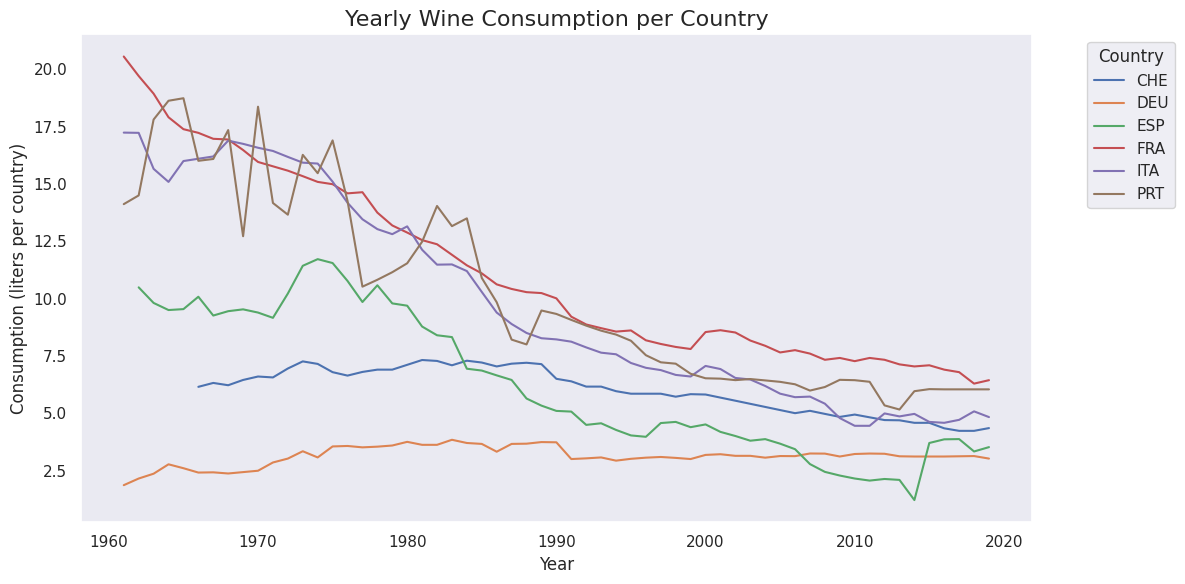

In [49]:
# Load the wine consumption data
consumption_data_path = '/workspaces/wine_analysis/data/raw/wine_consumption_country.csv'
consumption_data = pd.read_csv(consumption_data_path, sep=',', encoding='utf-8')

# Get the country codes from your wine data (df)
country_codes = df['country_code'].unique()

# Filter the consumption data for the countries in your wine data
filtered_consumption = consumption_data[consumption_data['Code'].isin(country_codes)]

# Group the data by year and country, summing up consumption (if necessary)
yearly_consumption = filtered_consumption.groupby(['Year', 'Code'])['Consumption'].sum().reset_index()

# Pivot the data for easier plotting (countries as columns, years as rows)
pivot_data = yearly_consumption.pivot(index='Year', columns='Code', values='Consumption')

# Plot the line chart
plt.figure(figsize=(12, 6))
for country in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[country], label=country)

# Add labels, title, and legend
plt.title('Yearly Wine Consumption per Country', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Consumption (liters per country)', fontsize=12)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()


### Boxplot (seaborn)

<Axes: xlabel='price'>

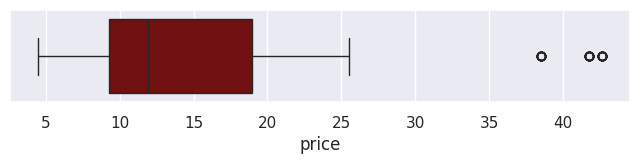

In [50]:
plt.figure(figsize=(8,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=df['price'], color="maroon")

### Histogram  (matplotlib)

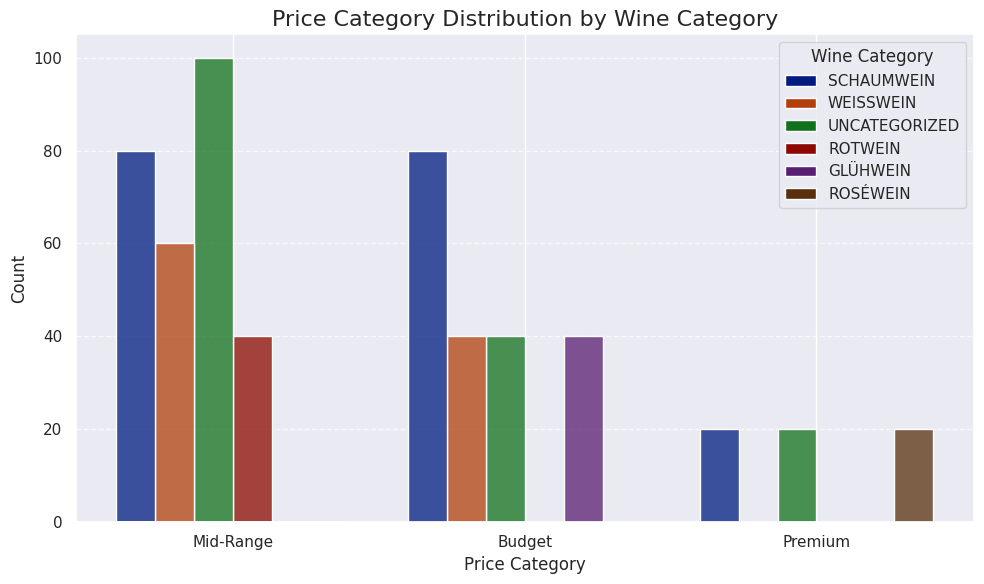

In [51]:
# Define the custom order for price categories
price_category_order = ['Budget', 'Mid-Range', 'Premium']

# Define the color palette
palette = sns.color_palette('dark', len(df['wine_category'].unique()))

# Map each wine category to a color
category_colors = dict(zip(df['wine_category'].unique(), palette))

plt.figure(figsize=(10, 6))

sns.histplot(
    data=df, 
    x='price_category', 
    hue='wine_category', 
    multiple='dodge', 
    shrink=0.8, 
    palette='dark'
)

plt.title('Price Category Distribution by Wine Category', fontsize=16)
plt.xlabel('Price Category', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add a custom legend showing the category colors
for category, color in category_colors.items():
    plt.bar(0, 0, color=color, label=category)
plt.legend(title='Wine Category', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


### Density plot  (seaborn)

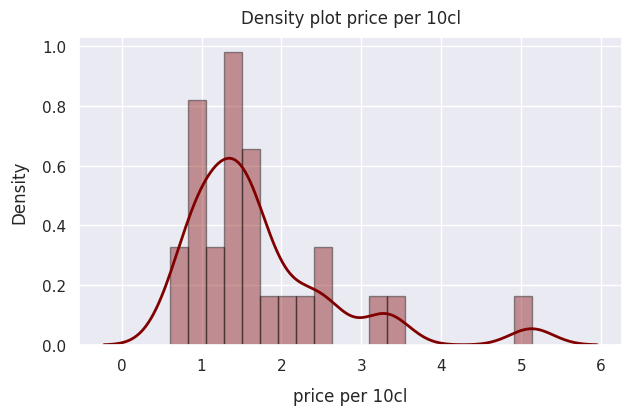

In [52]:
plt.figure(figsize=(7,4))
sns.distplot(df['price_per_10cl'], 
             hist=True, 
             kde=True, 
             bins=20, 
             color = 'maroon',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2},
            )
plt.title('Density plot price per 10cl', fontsize=12, pad=10)
plt.xlabel('price per 10cl', fontsize=12, labelpad=10)
plt.ylabel('Density', fontsize=12, labelpad=10)
plt.grid(True)
plt.show()

### Quantile-Quantile (QQ-) plot

     consumption_in_l       var
42               3.02 -1.998246
528              3.02 -1.998246
420              3.02 -1.998246
474              3.02 -1.998246
447              3.02 -1.998246
..                ...       ...
21               6.44  1.553593
22               6.44  1.553593
504              6.44  1.553593
453              6.44  1.553593
503              6.44  1.553593

[540 rows x 2 columns]


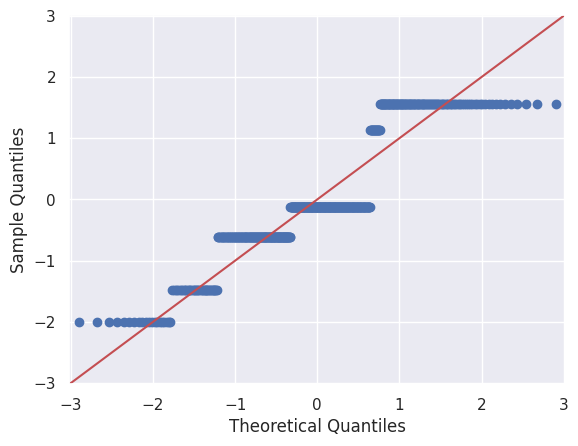

In [53]:
# Variable (standardized)
x = 'consumption_in_l'
df_qq = df
df_qq['var'] = (df[x]-df[x].mean()) / df[x].std()
print(df_qq.sort_values('var')[['consumption_in_l', 'var']])
    
# Plot
sm.qqplot(df_qq['var'], line ='45')
py.show()

### Barchart  (matplotlib)

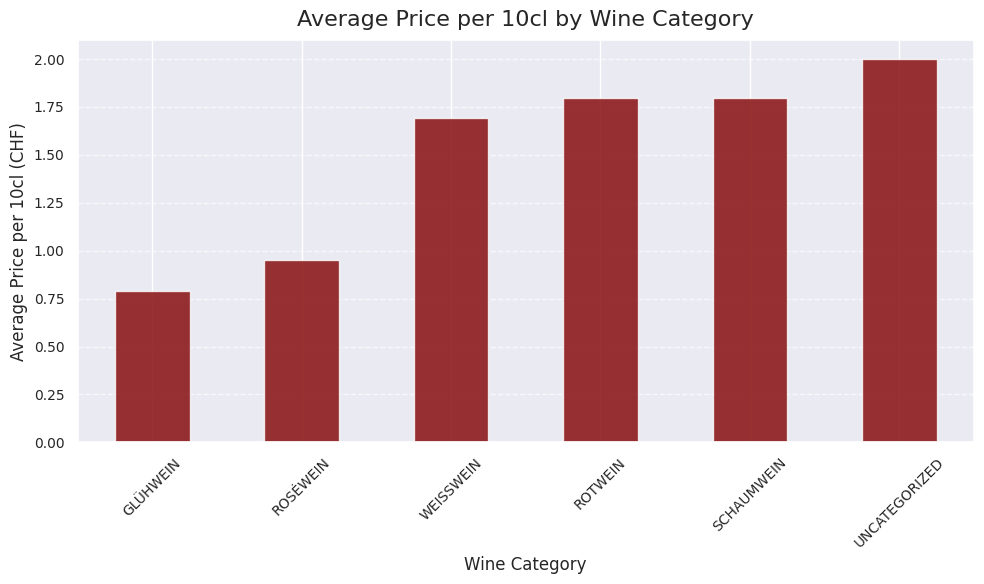

In [54]:
# Group by wine_category and calculate the average price_per_10cl
avg_price_per_category = df.groupby('wine_category')['price_per_10cl'].mean().sort_values()

# Create a bar chart
plt.figure(figsize=(10, 6))
avg_price_per_category.plot(kind='bar', color='maroon', alpha=0.8)

# Add labels and title
plt.title('Average Price per 10cl by Wine Category', fontsize=16, pad=10)
plt.xlabel('Wine Category', fontsize=12)
plt.ylabel('Average Price per 10cl (CHF)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Show grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


## Importing additional data wines_with_abv.csv

In [55]:
# Read the data to a pandas data frame
df_abv = pd.read_csv('/workspaces/wine_analysis/data/enriched/wines_with_abv.csv', sep=',', encoding='utf-8')

# Show first records of data frame
df_abv.head()

,web-scraper-order,web-scraper-start-url,name,price,country_raw,quantity,value,country,name_raw_len,bio,non_alcoholic,premium,wine_category,price_category,quantity_in_cl,price_per_10cl,country_code,consumption_in_l,ABV
0,1734709733-4,https://www.coop.ch/de/weine/alle-weine/c/m_25...,prosecco superiore di valdobbiadene conegliano...,10.95,Italien,75cl,1.46/10cl,Italien,79,0,0,1,SCHAUMWEIN,Mid-Range,75,1.46,ITA,4.83,11.0
1,1734709733-6,https://www.coop.ch/de/weine/alle-weine/c/m_25...,"champagne aoc charles bertin, brut",19.50,Frankreich,75cl,2.60/10cl,Frankreich,34,0,0,0,SCHAUMWEIN,Mid-Range,75,2.60,FRA,6.44,12.0
2,1734709733-7,https://www.coop.ch/de/weine/alle-weine/c/m_25...,"prosecco doc vigne dei dogi, extra dry",6.95,Italien,75cl,0.93/10cl,Italien,38,0,0,0,SCHAUMWEIN,Budget,75,0.93,ITA,4.83,11.0
3,1734709733-9,https://www.coop.ch/de/weine/alle-weine/c/m_25...,blu secco dose vino frizzante 6x20cl,8.70,Italien,120cl,0.73/10cl,Italien,36,0,0,0,SCHAUMWEIN,Budget,120,0.73,ITA,4.83,8.0
4,1734709733-10,https://www.coop.ch/de/weine/alle-weine/c/m_25...,toscana igt rosso villa antinori,12.95,"Italien, 2022",75cl,1.73/10cl,Italien,32,0,0,0,ROTWEIN,Mid-Range,75,1.73,ITA,4.83,5.0


### Piechart (matplotlib)

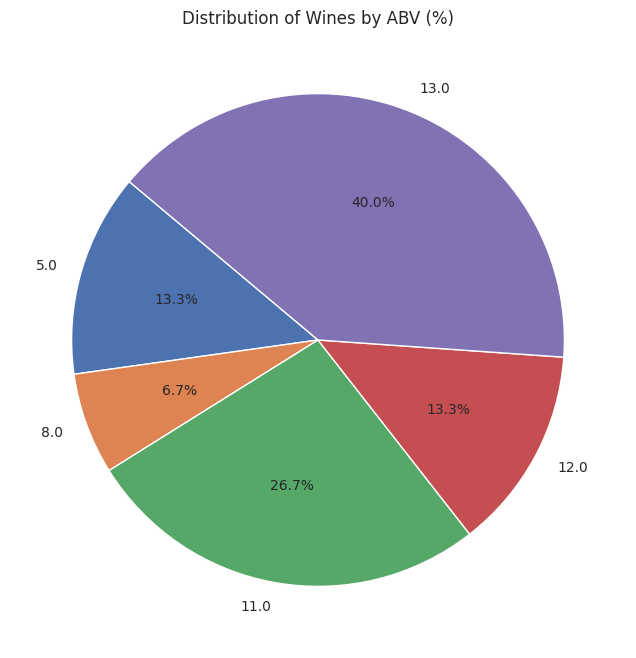

In [56]:
# Group by ABV and count the number of wines
abv_counts = df_abv['ABV'].value_counts().sort_index()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    abv_counts, 
    labels=abv_counts.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    textprops={'fontsize': 10}
)
plt.title('Distribution of Wines by ABV (%)')
plt.show()




## Multivariate graphical exploratory data analysis (EDA)

### Scatterplot (matplotlib)

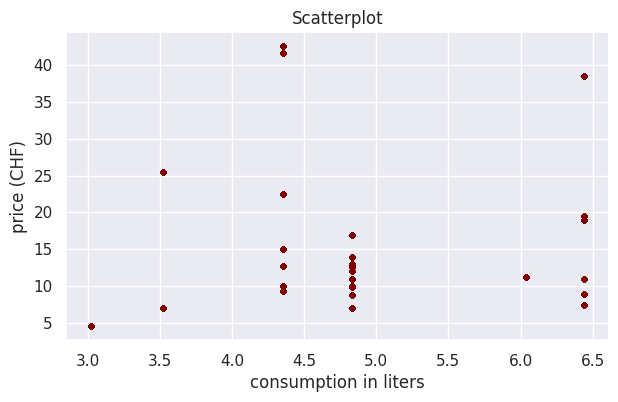

In [57]:
from matplotlib.ticker import MultipleLocator

plt.figure(figsize=(7, 4))

# Create the scatter plot
plt.scatter(df['consumption_in_l'], 
            df['price'], 
            color="maroon", 
            alpha=1.0, 
            s=10)

# Set title and axis labels
plt.title('Scatterplot', fontsize=12)
plt.xlabel('consumption in liters')
plt.ylabel('price (CHF)')


# Display the plot
plt.show()



### Scatterplot (matplotlib) with regression line

(540, 16)
0.357859118319234
13.815903196132064


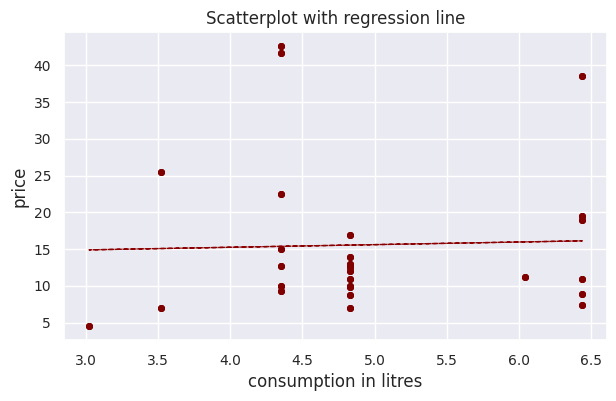

In [58]:
# Subset
df_sub = df.loc[(df.price >= 2)]
print(df_sub.shape)

# Scatterplot
plt.figure(figsize=(7,4))
plt.plot(df_sub.consumption_in_l, 
         df_sub.price, 
         'o', 
         markersize=3.5,
         color="maroon")

# Regression line (b = slope, a=intercept)
b, a = np.polyfit(df_sub.consumption_in_l, df_sub.price, 1)
print(b)
print(a)

# Plot regression line
plt.plot(df_sub.consumption_in_l, 
         b*df_sub.consumption_in_l + a, 
         linewidth=1,
         linestyle='dashed',
         color='darkred')

# Add title and axes labels
plt.title('Scatterplot with regression line', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.xlabel('consumption in litres', fontsize=12)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Scatterplot-matrix (seaborn)

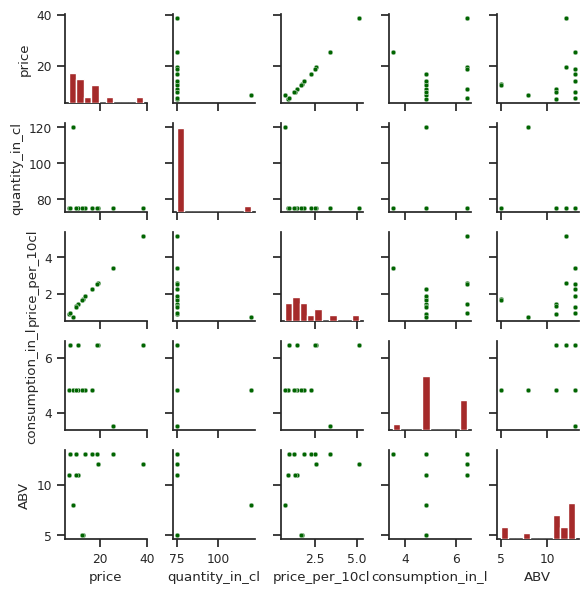

In [59]:
sns.set(style="ticks", font_scale=0.8)
g = sns.PairGrid(df_abv[['price', 
                     'quantity_in_cl', 
                     'price_per_10cl', 
                     'consumption_in_l',
                     'ABV']],
                 height=1.2, 
                 aspect=1)
g.map_upper(sns.scatterplot,color='darkgreen', s=10)
g.map_lower(sns.scatterplot, color='darkgreen', s=10)
g.map_diag(plt.hist, color='brown')

### Correlation heatmap (seaborn)

<Axes: >

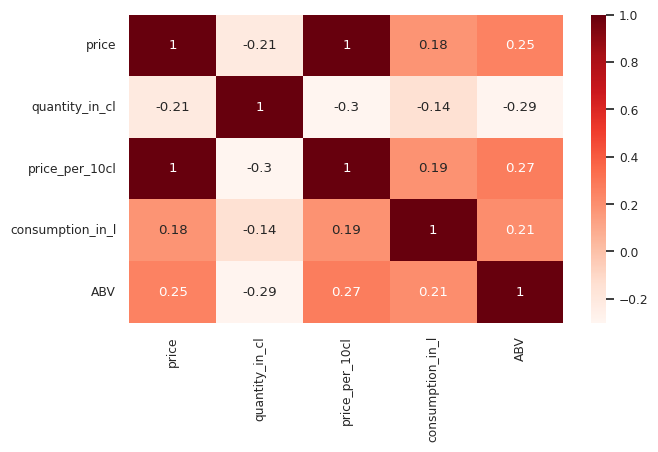

In [60]:
# Set font size for plot
sns.set(font_scale=0.8)

# Create correlation matrix as the basis for the heatmap
plt.figure(figsize=(7,4))
corr = df_abv[['price', 
                     'quantity_in_cl', 
                     'price_per_10cl', 
                     'consumption_in_l',
                     'ABV']].corr().round(2)

# Plot heatmap with a pastel color palette
sns.heatmap(corr, 
            cmap="Reds", 
            annot=True)

### Bubble plot (seaborn)

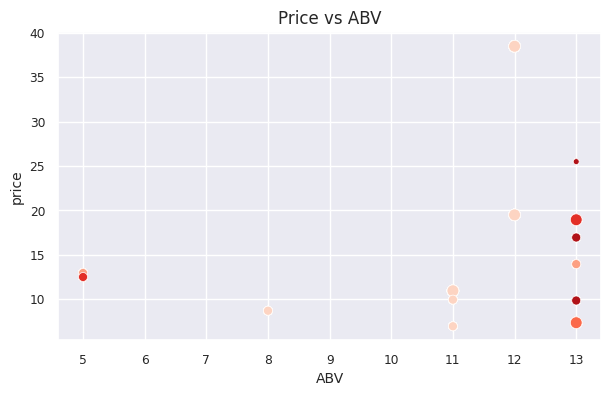

In [61]:
# Subset of df
df_sub = df_abv.loc[(df_abv['consumption_in_l'] >= 3) & (df_abv['consumption_in_l'] <= 10)]

plt.figure(figsize=(7,4))
plt.ticklabel_format(style='plain')
cmap = sns.cubehelix_palette(dark=.3, light=3, as_cmap=True)

ax = sns.scatterplot(x="ABV", 
                     y="price",
                     size="consumption_in_l", # determines bubble size
                     hue="wine_category",  # determines color
                     palette="Reds",
                     data=df_sub)

# Set title and axes
ax.set_title('Price vs ABV', fontsize = 12)
ax.set_xlabel('ABV', fontsize = 10)
ax.set_ylabel('price', fontsize = 10)
ax.legend([],[], frameon=False) # skip legend

### Jupyter notebook --footer info-- 

In [62]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.5.0-1025-azure
Datetime: 2025-01-09 15:05:01
Python Version: 3.12.1
-----------------------------------
